In [1]:
import requests
import time
import pandas as pd
import winsound
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import teamdashptshots, teaminfocommon
from nba_api.stats.library import data

In [2]:
team_ids = []
for team in data.teams:
    team_ids.append(team[0])
seasons = ['2018-19', '2019-20', '2020-21', '2021-22']

In [3]:
FG2M = 11
FG2A = 12
FG3M = 15
FG3A = 16

In [4]:
clockRangesFG2A =\
    {'24-22':0, '22-18 Very Early':0, '18-15 Early':0, '15-7 Average':0, '7-4 Late':0, '4-0 Very Late':0}
clockRangesFG2M =\
    {'24-22':0, '22-18 Very Early':0, '18-15 Early':0, '15-7 Average':0, '7-4 Late':0, '4-0 Very Late':0}
clockRangesFG3A = \
    {'24-22':0, '22-18 Very Early':0, '18-15 Early':0, '15-7 Average':0, '7-4 Late':0, '4-0 Very Late':0}
clockRangesFG3M = \
    {'24-22':0, '22-18 Very Early':0, '18-15 Early':0, '15-7 Average':0, '7-4 Late':0, '4-0 Very Late':0}
for year in seasons:
    for team in team_ids:
        team_clock = teamdashptshots.TeamDashPtShots(team_id = team, season=year).shot_clock_shooting.get_dict()['data']
        for clock_range in team_clock:
            clockRangesFG2M[clock_range[4]] +=\
                (clock_range[FG2M]) if (clock_range[FG2M] is not None) else 0
            clockRangesFG2A[clock_range[4]] +=\
                (clock_range[FG2A]) if (clock_range[FG2A] is not None) else 0
            clockRangesFG3M[clock_range[4]] +=\
                (clock_range[FG3M]) if (clock_range[FG3M] is not None) else 0
            clockRangesFG3A[clock_range[4]] +=\
                (clock_range[FG3A]) if (clock_range[FG3A] is not None) else 0
        time.sleep(.5)
winsound.Beep(1000, 440)

In [5]:
FGA = {key: clockRangesFG2A[key] + clockRangesFG3A.get(key)
                        for key in clockRangesFG2A.keys()}
FGM = {key: clockRangesFG2M[key] + clockRangesFG3M.get(key)
                        for key in clockRangesFG2M.keys()}

In [6]:
FG2P = {key: clockRangesFG2M[key] / clockRangesFG2A.get(key)
                        for key in clockRangesFG2M.keys()}
FG3P = {key: clockRangesFG3M[key] / clockRangesFG3A.get(key)
                        for key in clockRangesFG3M.keys()}
EFG = {key: ((clockRangesFG2M[key] + (1.5 * clockRangesFG3M.get(key)))/FGA.get(key))
                        for key in clockRangesFG3M.keys()}
FG = {key: FGM[key] / FGA.get(key) for key in clockRangesFG3M.keys()}

In [7]:
clockPercentages = {'FG':FG, 'EFG':EFG, '3FG':FG3P, '2FG':FG2P}
df = pd.DataFrame.from_dict(clockPercentages)
df.to_csv(r'clockPercentages.csv', index=True, header=True)

In [8]:
df

,FG,EFG,3FG,2FG
24-22,0.571675,0.580069,0.350515,0.582800
22-18 Very Early,0.521794,0.597643,0.373524,0.623189
18-15 Early,0.470212,0.547588,0.374401,0.537714
15-7 Average,0.460125,0.529801,0.368748,0.515634
7-4 Late,0.434039,0.499776,0.351049,0.483730
4-0 Very Late,0.355214,0.413154,0.262431,0.428579


In [9]:
plt.rcParams["figure.figsize"] = (10,5)

Text(0.5, 1.0, 'Effective Field Goal Percentage')

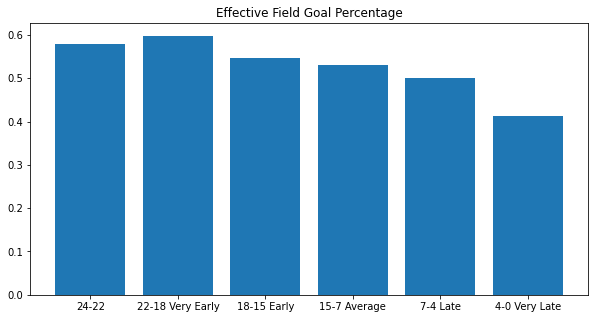

In [10]:
plt.bar(x=EFG.keys(), height=EFG.values())
plt.title('Effective Field Goal Percentage')

Text(0.5, 1.0, '3 Point Field Goal Percentage')

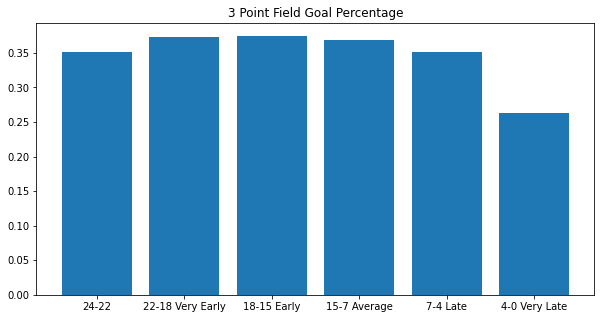

In [11]:
plt.bar(x=FG3P.keys(), height=FG3P.values())
plt.title('3 Point Field Goal Percentage')

Text(0.5, 1.0, '2 Point Field Goal Percentage')

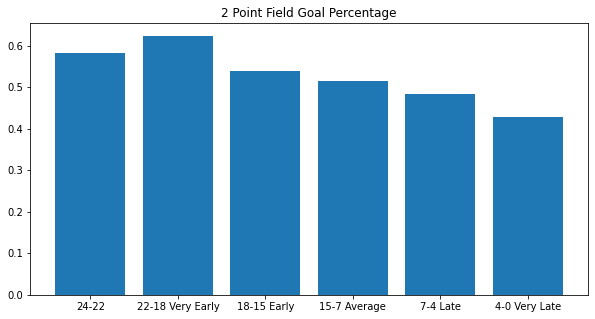

In [12]:
plt.bar(x=FG2P.keys(), height=FG2P.values())
plt.title('2 Point Field Goal Percentage')

Text(0.5, 1.0, 'Field Goal Percentage')

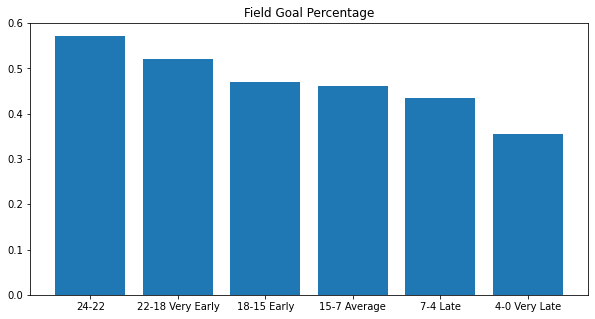

In [13]:
plt.bar(x=FG.keys(), height=FG.values())
plt.title('Field Goal Percentage')